Question 1 -- https://tigermailauburn-my.sharepoint.com/:o:/g/personal/ajr0102_auburn_edu/Ej6i6yqBVoJGmkIo5MuLv-YB5CWf2jPL48-k-sZVUZX_yw?e=EtthxJ
This is a link to the handwritten question one, if this is not sufficient my email is ajr0102@auburn.edu



Imports


In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

Activation Function

Load Data

Shape of X_train: (100, 2)
Shape of Y_train: (100, 1)
Shape of X_test: (50, 2)
Shape of Y_test: (50, 1)


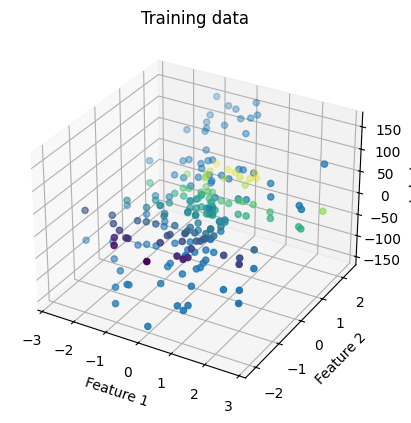

In [34]:
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_train = Y_train.reshape(-1,1)

X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")
Y_test = Y_test.reshape(-1,1)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create a 3D scatter plot
ax.scatter(X_train[:, 0], X_train[:, 1], Y_train)

# set the labels for the x, y, and z axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label')

# set the title of the plot
ax.set_title('Training data')


# create a scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], s=20,c=Y_train.flatten())

# set the labels for the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# set the title of the plot
plt.title('Training data')


# display the plot
plt.show()

MLP Implementation

In [89]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights1 = np.random.rand(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.rand(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1-x)

    def r_squared(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)


    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, input_data):
        self.layer1 = self.sigmoid(np.dot(input_data, self.weights1))
        output = self.sigmoid(np.dot(self.layer1, self.weights2))
        return output

    def train(self, input_data, expected_output, num_iterations):
        accuracy_list = []
        mse_list = []
        for _ in range(num_iterations):
            output = self.forward(input_data)
            
            # d_weights2 = np.dot(self.layer1.T, (2*(output - expected_output) * self.sigmoid_derivative(output)))
            # d_weights1 = np.dot(input_data.T,  (np.dot(2*(output - expected_output) * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.layer1)))

            # d_bias2 = 2*(output - expected_output) * self.sigmoid_derivative(output)
            # d_bias1 = np.dot(2*(output - expected_output) * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.layer1)

            d_weights2 = np.dot(self.layer1.T, ((expected_output - output) * self.sigmoid_derivative(output)))
            d_weights1 = np.dot(input_data.T,  (np.dot((expected_output - output) * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.layer1)))

            self.weights1 += d_weights1 * self.learning_rate
            self.weights2 += d_weights2 * self.learning_rate

            d_bias2 = 2*(expected_output - output) * self.sigmoid_derivative(output)
            d_bias1 = np.dot(2*(expected_output - output) * self.sigmoid_derivative(output), self.weights2.T) * self.sigmoid_derivative(self.layer1)
            self.bias1 += np.sum(d_bias1, axis=0) * self.learning_rate
            self.bias2 += np.sum(d_bias2, axis=0) * self.learning_rate

            

            output = self.forward(input_data)
            # Calculate accuracy and MSE
            accuracy = self.r_squared(expected_output, output)
            mse = self.mse(expected_output, output)
            
            # Append to lists
            accuracy_list.append(accuracy)
            mse_list.append(mse)
        
        return accuracy_list, mse_list            

    

    def predict(self, features):
        hidden_inputs = np.dot(features, self.weights1) + self.bias1
        hidden_outputs = self.sigmoid(hidden_inputs)

        final_inputs = np.dot(hidden_outputs, self.weights2) + self.bias2
        final_outputs = final_inputs  # apply linear activation function to output layer

        return final_outputs

Train and Evaluate

MSE: 737.5476882180524
R-squared: 0.87
1000000


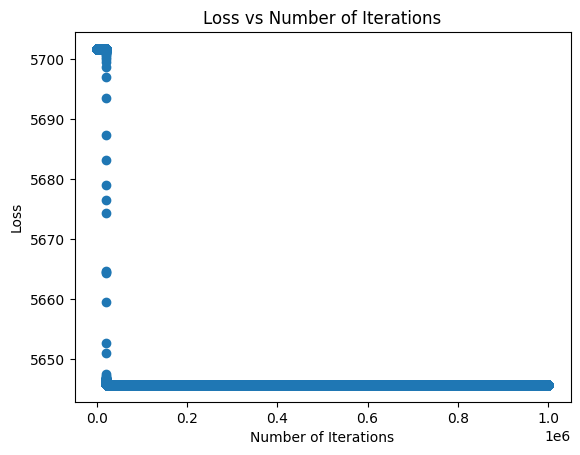

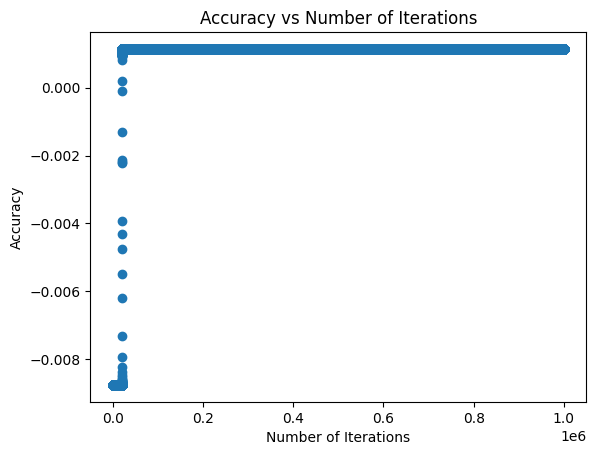

In [90]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# create an instance of the MLP class
mlp = MLP(2, 128, 1, .001)

# train the MLP on the training data
accuracy_list, mse_list= mlp.train(X_train, Y_train, 1000000)

# # make predictions on the test data
y_pred = mlp.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# print(f"y_pred: {y_pred}\n y_test: {Y_test}")

# # evaluate the accuracy of the MLP
MSE = mse(Y_test, y_pred)
print(f"MSE: {MSE}")



def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_value = r_squared(Y_test, y_pred)
print(f"R-squared: {r2_value:.2f}")

print(len(mse_list))

# Plot loss
plt.scatter(range(len(mse_list)), mse_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Number of Iterations')
plt.show()

# Plot accuracy
plt.scatter(range(len(accuracy_list)), accuracy_list)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Iterations')
plt.show()

In [49]:
class MLPtanh:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights1 = np.random.rand(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.rand(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2

    def forward(self, input_data):
        self.layer1 = self.tanh(np.dot(input_data, self.weights1))
        output = self.tanh(np.dot(self.layer1, self.weights2))
        return output

    def train(self, input_data, expected_output, num_iterations):
        for _ in range(num_iterations):
            output = self.forward(input_data)
            d_weights2 = np.dot(self.layer1.T, (2*(expected_output - output) * self.tanh_derivative(output)))
            d_weights1 = np.dot(input_data.T,  (np.dot(2*(expected_output - output) * self.tanh_derivative(output), self.weights2.T) * self.tanh_derivative(self.layer1)))

            self.weights1 += d_weights1 * self.learning_rate
            self.weights2 += d_weights2 * self.learning_rate

            d_bias2 = 2*(expected_output - output) * self.tanh_derivative(output)
            d_bias1 = np.dot(2*(expected_output - output) * self.tanh_derivative(output), self.weights2.T) * self.tanh_derivative(self.layer1)
            self.bias1 += np.sum(d_bias1, axis=0) * self.learning_rate
            self.bias2 += np.sum(d_bias2, axis=0) * self.learning_rate

    def predict(self, features):
        hidden_inputs = np.dot(features, self.weights1) + self.bias1
        hidden_outputs = self.tanh(hidden_inputs)

        final_inputs = np.dot(hidden_outputs, self.weights2) + self.bias2
        final_outputs = final_inputs  # apply linear activation function to output layer

        return final_outputs

In [ ]:
# create an instance of the MLP class
tanh_mlp = MLPtanh(2, 128, 1, .000000001)

# train the MLP on the training data
tanh_mlp.train(X_train, Y_train, 100000)

# # make predictions on the test data
y_pred_tanh = tanh_mlp.predict(X_test)
y_pred_tanh = y_pred_tanh.reshape(-1, 1)

# print(f"y_pred: {y_pred}\n y_test: {Y_test}")

# # evaluate the accuracy of the MLP
MSE = mse(Y_test, y_pred_tanh)
print(f"MSE: {MSE}")

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_value = r_squared(Y_test, y_pred_tanh)
print(f"R-squared: {r2_value:.2f}")

In [ ]:
plt.scatter(Y_test, y_pred_tanh)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("tanh")

plt.show()

In [50]:
class MLPrelu:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights1 = np.random.rand(self.input_size, self.hidden_size)
        self.bias1 = np.zeros(self.hidden_size)
        self.weights2 = np.random.rand(self.hidden_size, self.output_size)
        self.bias2 = np.zeros(self.output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, input_data):
        self.layer1 = self.relu(np.dot(input_data, self.weights1) + self.bias1)
        output = self.relu(np.dot(self.layer1, self.weights2) + self.bias2)
        return output

    def train(self, input_data, expected_output, num_iterations):
        for _ in range(num_iterations):
            output = self.forward(input_data)
            d_weights2 = np.dot(self.layer1.T, (2*(expected_output - output) * self.relu_derivative(output)))
            d_weights1 = np.dot(input_data.T,  (np.dot(2*(expected_output - output) * self.relu_derivative(output), self.weights2.T) * self.relu_derivative(self.layer1)))

            self.weights1 += d_weights1 * self.learning_rate
            self.weights2 += d_weights2 * self.learning_rate

            d_bias2 = 2*(expected_output - output) * self.relu_derivative(output)
            d_bias1 = np.dot(2*(expected_output - output) * self.relu_derivative(output), self.weights2.T) * self.relu_derivative(self.layer1)
            self.bias1 += np.sum(d_bias1, axis=0) * self.learning_rate
            self.bias2 += np.sum(d_bias2, axis=0) * self.learning_rate

    def predict(self, features):
        hidden_inputs = np.dot(features, self.weights1) + self.bias1
        hidden_outputs = self.relu(hidden_inputs)

        final_inputs = np.dot(hidden_outputs, self.weights2) + self.bias2
        final_outputs = final_inputs

        return final_outputs

In [58]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# create an instance of the MLPrelu class
mlp = MLPrelu(2, 128, 1, .00001)

# train the MLP on the training data
mlp.train(X_train, Y_train, 100000)

# # make predictions on the test data
y_pred_relu = mlp.predict(X_test)
y_pred_relu = y_pred_relu.reshape(-1, 1)

# print(f"y_pred: {y_pred}\n y_test: {Y_test}")

# # evaluate the accuracy of the MLP
MSE = mse(Y_test, y_pred_relu)
print(f"MSE: {MSE}")

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_value = r_squared(Y_test, y_pred_relu)
print(f"R-squared: {r2_value:.2f}")

MSE: 2439.188108110231
R-squared: 0.56


In [ ]:
plt.scatter(Y_test, y_pred_relu)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("ReLU")

plt.show()

Learning Rate: 1.000, R-squared: -48088.07, MSE: 264507575.57600644


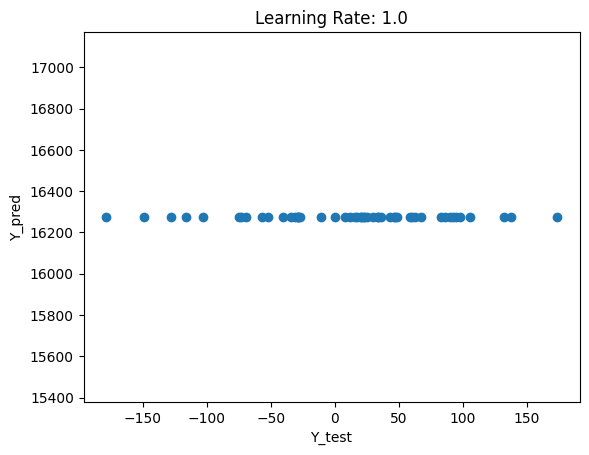

Learning Rate: 0.100, R-squared: -48.47, MSE: 272075.89291405486


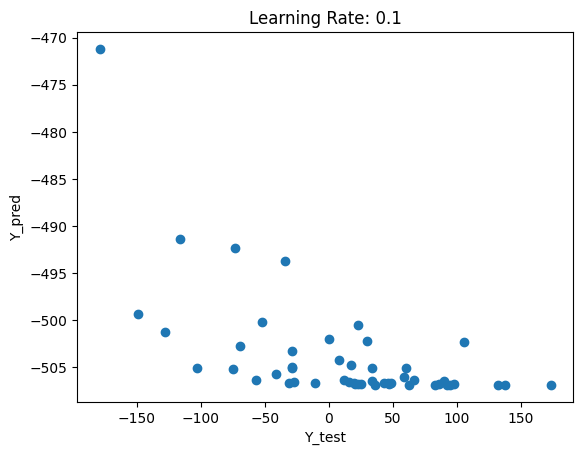

Learning Rate: 0.010, R-squared: -35.65, MSE: 201571.48685090788


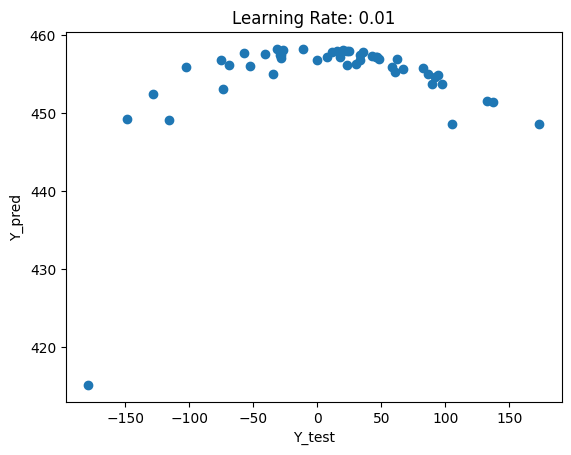

Learning Rate: 0.001, R-squared: 0.69, MSE: 1728.647648608395


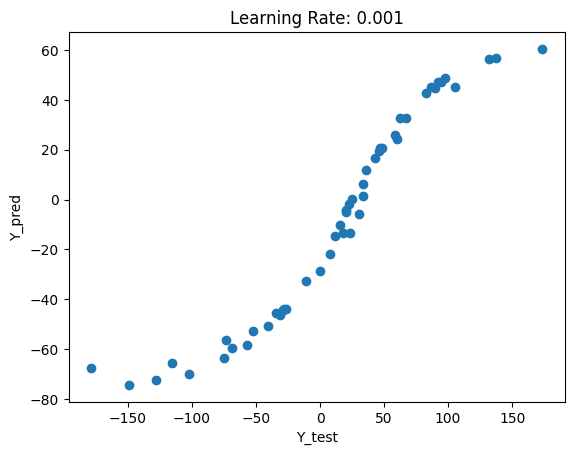

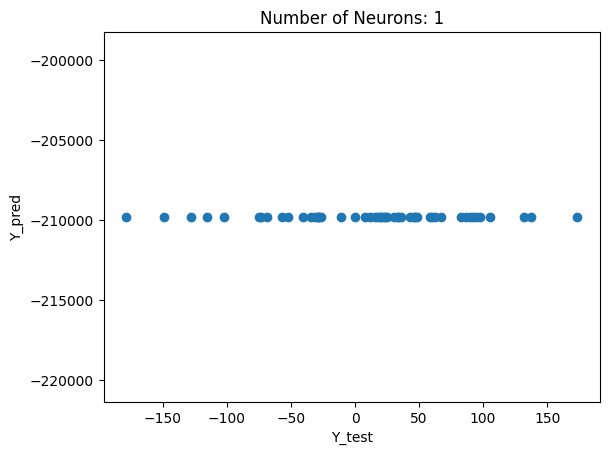

Number of Neurons: 1, R-squared: -8003222.87, MSE: 44020671585.794044


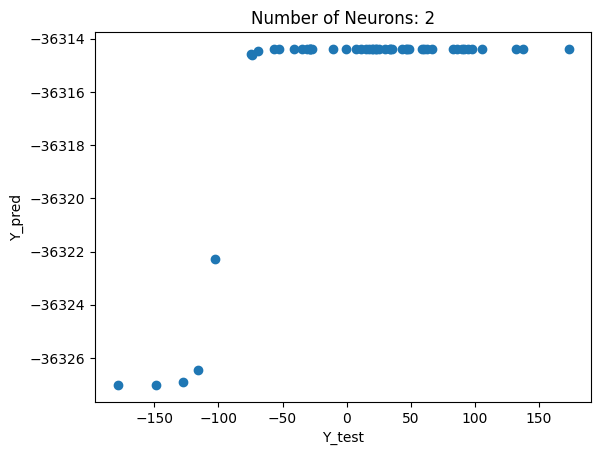

Number of Neurons: 2, R-squared: -239925.69, MSE: 1319684950.5793102


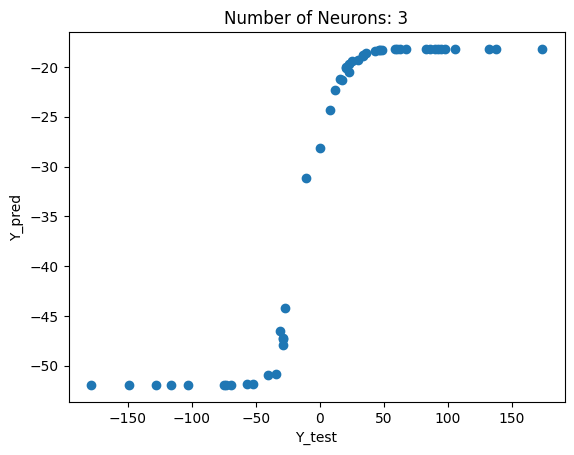

Number of Neurons: 3, R-squared: -0.02, MSE: 5597.509360358339


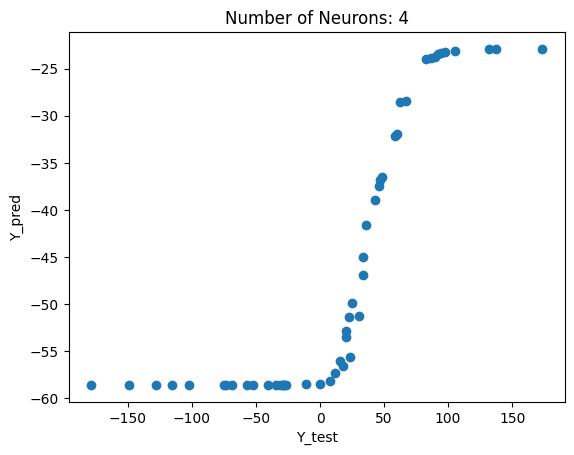

Number of Neurons: 4, R-squared: -0.32, MSE: 7256.664223359673


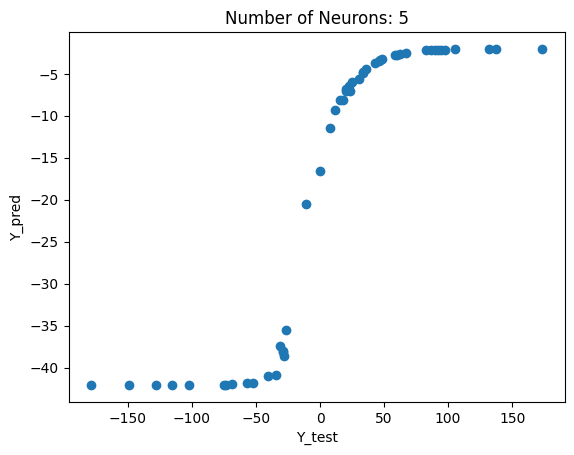

Number of Neurons: 5, R-squared: 0.20, MSE: 4418.933353682151


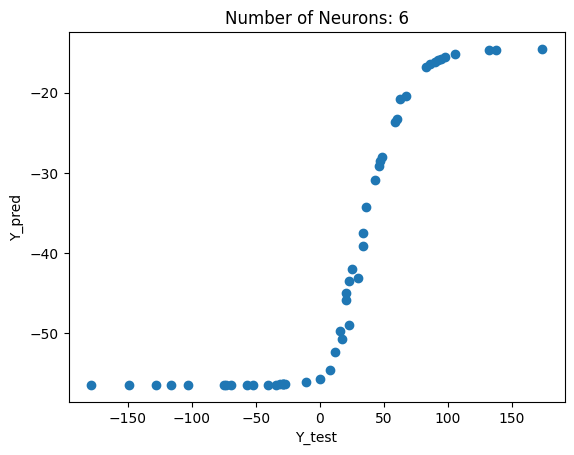

Number of Neurons: 6, R-squared: -0.16, MSE: 6384.37420775608


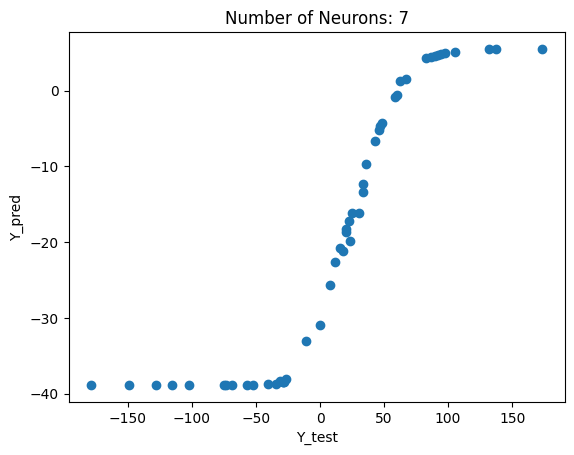

Number of Neurons: 7, R-squared: 0.20, MSE: 4388.457969560773


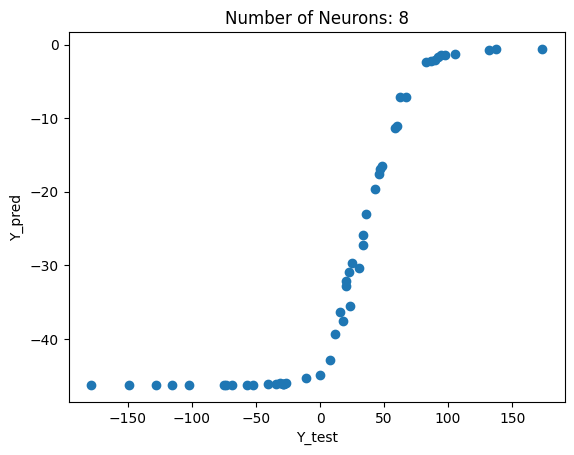

Number of Neurons: 8, R-squared: 0.07, MSE: 5130.525421316927


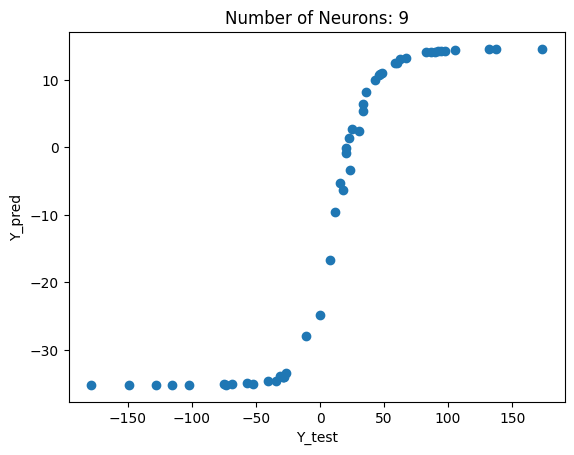

Number of Neurons: 9, R-squared: 0.35, MSE: 3584.946015593415


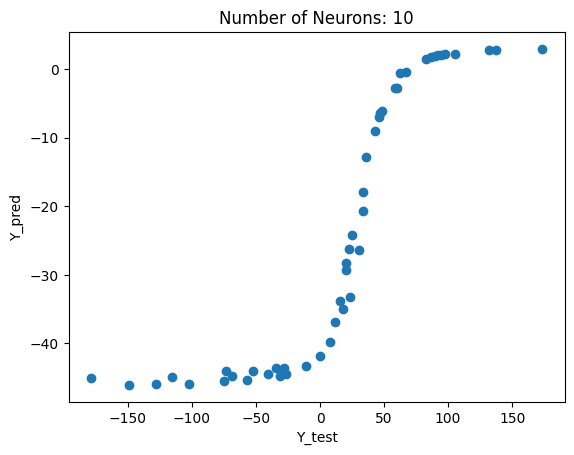

Number of Neurons: 10, R-squared: 0.15, MSE: 4669.418913541015


In [91]:
def run_mlp_with_varying_learning_rate(X_train, Y_train, X_test, Y_test):
    learning_rate = 1.0
    while learning_rate >= 0.001:
        # create an instance of the MLP class with the current learning rate
        mlp = MLP(2, 128, 1, learning_rate)

        # train the MLP on the training data
        mlp.train(X_train, Y_train, 150000)

        # make predictions on the test data
        y_pred = mlp.predict(X_test)
        y_pred = y_pred.reshape(-1, 1)

        # evaluate the accuracy of the MLP
        r2_value = r_squared(Y_test, y_pred)

        MSE = mse(Y_test, y_pred)

        print(f"Learning Rate: {learning_rate:.3f}, R-squared: {r2_value:.2f}, MSE: {MSE}")

        plt.scatter(Y_test, y_pred)
        plt.xlabel("Y_test")
        plt.ylabel("Y_pred")
        plt.title(f"Learning Rate: {learning_rate}")

        plt.show()

        # reduce the learning rate by a factor of ten
        learning_rate /= 10

def run_mlp_with_varying_neurons(X_train, Y_train, X_test, Y_test):
    for num_neurons in range(1, 11):
        # create an instance of the MLP class with the current number of neurons
        mlp = MLP(2, num_neurons, 1, 0.001)

        # train the MLP on the training data
        mlp.train(X_train, Y_train, 150000)

        # make predictions on the test data
        y_pred = mlp.predict(X_test)
        y_pred = y_pred.reshape(-1, 1)

        plt.scatter(Y_test, y_pred)
        plt.xlabel("Y_test")
        plt.ylabel("Y_pred")
        plt.title(f"Number of Neurons: {num_neurons}")

        plt.show()

        # evaluate the accuracy of the MLP
        r2_value = r_squared(Y_test, y_pred)

        MSE = mse(Y_test, y_pred)
        
        print(f"Number of Neurons: {num_neurons}, R-squared: {r2_value:.2f}, MSE: {MSE}")


run_mlp_with_varying_learning_rate(X_train, Y_train, X_test, Y_test)
run_mlp_with_varying_neurons(X_train, Y_train, X_test, Y_test)



1. What is the activation function that you will choose for the output layer? Justify your answer
briefly.
2. How many neurons should there be in the output layer? Why?
3. Report the average MSE loss and the accuracy.
4. Plot the loss and accuracy as a function of the number of iterations.
5. What is the effect of the learning rate on the training process? Vary the learning rate to be
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
6. What is the effect of the number of neurons in the hidden layer? To answer this question,
you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule
need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.
7. What is the effect of the activation functions in the network? Explore two different activation
functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.

1. I chose a linear activation function for the output layer because the y data seems to be non-categorical and is a continuous function, which cannot be expressed by sigmoid, softmax, or tanh. Thus, I used a linear function in my output.
2. There should be one neuron in the output because there is only one feature in the y data set. 
3. The MSE is 764 for my best implementation of the MLP with an accuracy of .86. I used only one hidden layer, and one output layer with the following hyperparameters: 2 input nuerons, 128 neurons in the hidden layer, 1 neuron in the output layer, .001 learning rate, 1,550,000 iterations. Given that my implementation correctly executes and updates the gradients, I would need to find the optimal hyperparameters to optimize the accuracy of the model. Adding additional layers to the model could also improve the accuracy, but given that the assignment requires only 1 hidden layer be used I attempted to maximize the accuracy by manually adjusting the parameters.
4. See the plot above
5. The effect of the learning rate seems to have a significant effect on the accuracy of the model. A higher learning rate results in the gradient chaing too rapidly and reducing the accuracy of the system significantly. As the learnign rate gets closer to 0 the accuracy getse closer and closer to 1. Reducing the step or the learning rate allows the model to train more gradually and step closer and closer to the global minima of the cost function.
6. The update rules does not need to be updated again because the number of layers is not changing, just the number of neurons in a layer are changing. 
The final loss for the higher number of neurons was considerably lower than that of the lower number of neurons. The ideal scatter plot would be a resemble a linear function, and as the learning rate decreases this can be seen to be true as well. 

7. The update rules need to change slightly to accomodate for a new activation function. Given that the function and its derivative are important in deriving the update rules, it is necessary to make slight alterations and account for a new function and its derivative.

The final MSE for my non sigmoid activation function MLPs was considerably higher than that of the sigmoid. This can be attributed to attmpething to use an inoptimal activation function in the MLP. The sigmoid activation functions seems to be the best function for this application. The true lables are somewhat correlated to the predicted labels with it being a stronger correlation for the tanh across the entire domain.
